In [171]:
import pickle

with open('../model/data/paradeigma_ts_data_preprocessing.pkl', 'rb') as f:
    target_data_frames = pickle.load(f)

In [172]:
target_data_frames[1].keys()

Index(['segment_id', 'emotion', 'valence', 'arousal', 'eda', 'temp', 'ibi'], dtype='object')

In [173]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

num_sessions = 40

eva_df = pd.DataFrame(columns = ['emotion', 'valence', 'arousal'])
for session in range(num_sessions):
    
    emotion = target_data_frames[session+1]['emotion']
    valence = target_data_frames[session+1]['valence']
    arousal = target_data_frames[session+1]['arousal']
    
    new_df = pd.DataFrame([emotion, valence, arousal]).T
    eva_df = e_v_a_df.append(new_df, ignore_index = True)

In [174]:
eva_df

,emotion,valence,arousal
0,neutral,3.4,2.9
1,neutral,3.1,2.9
2,neutral,3.1,3
3,neutral,3.7,3.1
4,neutral,3.8,2.8
...,...,...,...
13955,neutral,3,3.5
13956,neutral,2.9,3.1
13957,neutral,2.6,3.6
13958,neutral,2.7,3.3


In [175]:
several_target_index = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[]}
several_target_counter = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0}

for i in range(len(eva_df['emotion'])):
    several_target_index[eva_df['emotion'][i].count(';') + 1].append(i)
    several_target_counter[eva_df['emotion'][i].count(';') + 1]+= 1

In [176]:
several_target_counter

{1: 13306, 2: 646, 3: 7, 4: 0, 5: 1, 6: 0, 7: 0}

In [180]:
eva_df.iloc[several_target_index[1]]

,emotion,valence,arousal
0,neutral,3.4,2.9
1,neutral,3.1,2.9
2,neutral,3.1,3.0
3,neutral,3.7,3.1
4,neutral,3.8,2.8
...,...,...,...
13955,neutral,3.0,3.5
13956,neutral,2.9,3.1
13957,neutral,2.6,3.6
13958,neutral,2.7,3.3


In [181]:
eva_df['valence'] = eva_df['valence'].apply(lambda x: float(x))
eva_df['arousal'] = eva_df['arousal'].apply(lambda x: float(x))

In [185]:
eva_df_single = eva_df.iloc[several_target_index[1]]

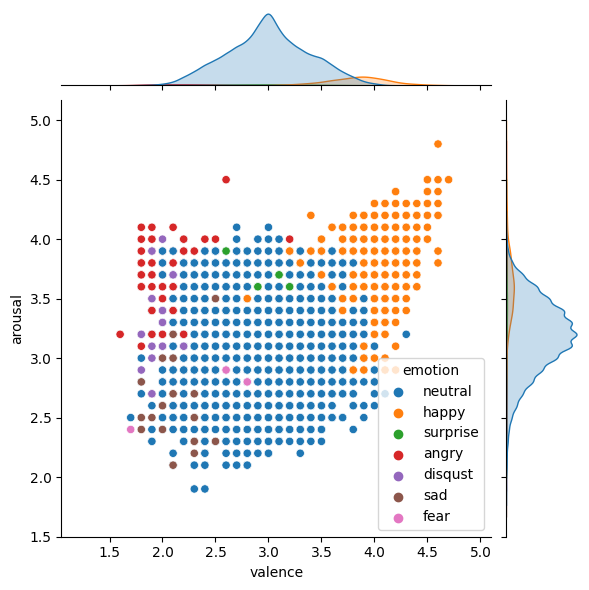

In [186]:
sns.jointplot(x='valence', y='arousal', data=eva_df_single, hue='emotion')

In [189]:
eva_df_single['emotion'][
        (eva_df_single['emotion']!='neutral') &
        (eva_df_single['emotion']!='happy')]

403      surprise
424      surprise
647         angry
660      surprise
662      surprise
           ...   
13921        fear
13927        fear
13938    surprise
13940    surprise
13942        fear
Name: emotion, Length: 538, dtype: object

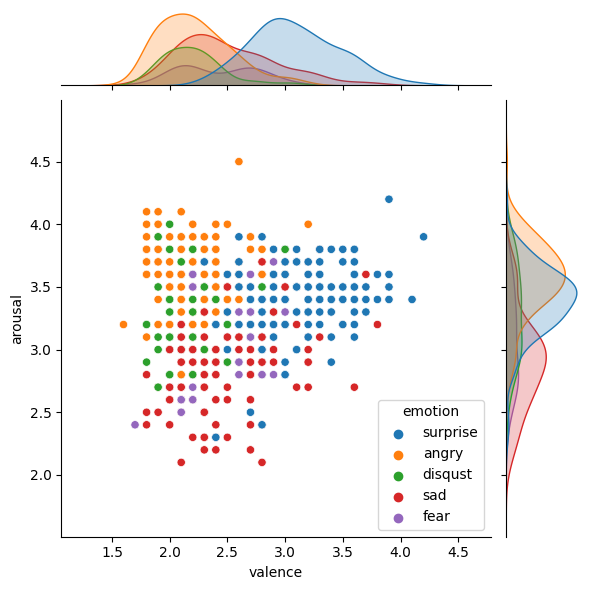

In [190]:
sns.jointplot(
    x='valence', y='arousal', 
    data=eva_df_single[
        (eva_df_single['emotion']!='neutral') &
        (eva_df_single['emotion']!='happy')
        ], hue='emotion')

In [170]:
def power_movement(value, x):
    return value ** x

def parallel_movement(value, x):
     return value + x
 
def multiple_movement(value, x):
     return value * x

In [152]:
t_eva_df['valence'] = eva_df['valence'].apply(parallel_movement, x = -1)
t_eva_df['arousal'] = eva_df['arousal'].apply(parallel_movement, x = -1)

t_eva_df['valence'] = eva_df['valence'].apply(power_movement, x = 3)
t_eva_df['arousal'] = eva_df['arousal'].apply(power_movement, x = 3)

In [153]:
t_eva_df['arousal']

0        24.389
1        24.389
2        27.000
3        29.791
4        21.952
          ...  
13955    42.875
13956    29.791
13957    46.656
13958    35.937
13959    39.304
Name: arousal, Length: 13960, dtype: float64

In [154]:
t_eva_df = pd.DataFrame([eva_df['emotion'], t_eva_df['valence'], t_eva_df['arousal']]).T

In [155]:
t_eva_df

,emotion,valence,arousal
0,neutral,39.304,24.389
1,neutral,29.791,24.389
2,neutral,29.791,27.0
3,neutral,50.653,29.791
4,neutral,54.872,21.952
...,...,...,...
13955,neutral,27.0,42.875
13956,neutral,24.389,29.791
13957,neutral,17.576,46.656
13958,neutral,19.683,35.937


In [89]:
# def parallel_movement(value, x):
#     return value + x

# eva_df['valence'] = eva_df['valence'].apply(parallel_movement, x = -3)
# eva_df['arousal'] = eva_df['arousal'].apply(parallel_movement, x = -3)

In [90]:
# def multiple_movement(value, x):
#     return value * x

# eva_df['valence'] = eva_df['valence'].apply(multiple_movement, x = 5)
# eva_df['arousal'] = eva_df['arousal'].apply(multiple_movement, x = 5)

In [156]:
eva_df_single = eva_df.iloc[several_target_index[1]]

In [157]:
t_eva_df_single = t_eva_df.iloc[several_target_index[1]]

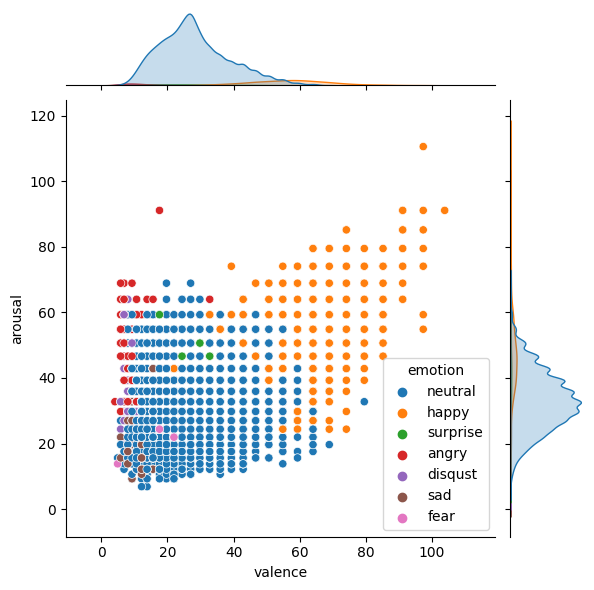

In [158]:
sns.jointplot(x='valence', y='arousal', data=t_eva_df_single, hue='emotion')

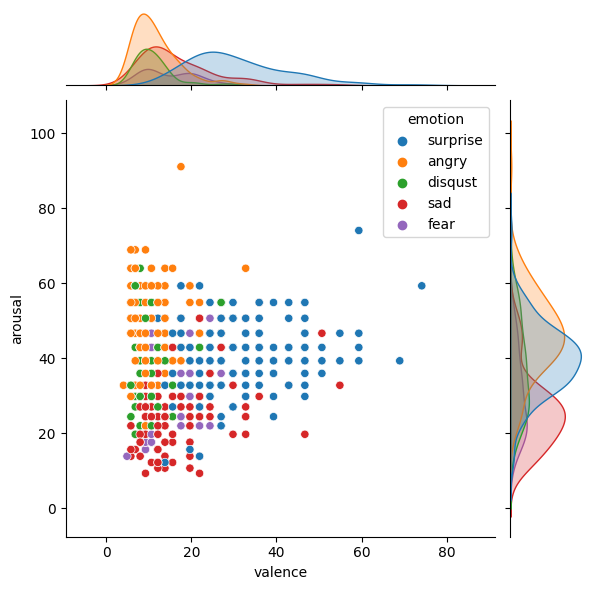

In [163]:
sns.jointplot(x='valence', y='arousal', data=t_eva_df_single[(t_eva_df_single['emotion'] != 'neutral') & (t_eva_df_single['emotion'] != 'happy') ], hue='emotion')

In [ ]:
t_eva_df_single['emotion']

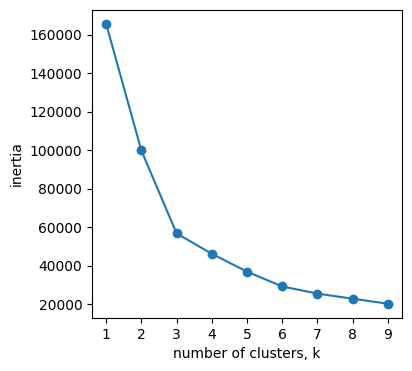

In [165]:
from sklearn.cluster import KMeans

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(t_eva_df_single[
        (t_eva_df_single['emotion'] != 'surprise') & 
        (t_eva_df_single['emotion'] != 'neutral') & 
        (t_eva_df_single['emotion'] != 'happy') &
        ][['valence', 'arousal']])
    inertias.append(model.inertia_)
    
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()   

In [162]:
from sklearn.cluster import KMeans

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(t_eva_df_single[(t_eva_df_single['emotion'] != 'neutral') & (t_eva_df_single['emotion'] != 'happy') ][['valence', 'arousal']])
    inertias.append(model.inertia_)
    
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()   

,emotion,valence,arousal
0,neutral,39.304,24.389
1,neutral,29.791,24.389
2,neutral,29.791,27.0
3,neutral,50.653,29.791
4,neutral,54.872,21.952
...,...,...,...
13955,neutral,27.0,42.875
13956,neutral,24.389,29.791
13957,neutral,17.576,46.656
13958,neutral,19.683,35.937
